<a href="https://colab.research.google.com/github/vaibhavnagar02/Stock-Prediction_2022/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_train = pd.read_csv("AAPL.csv")

In [5]:
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [6]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [8]:
df_train.shape

(10468, 7)

Working on Open Column


In [9]:
training_set = df_train.iloc[:,1:2]
print(training_set)

             Open
0        0.128348
1        0.122210
2        0.113281
3        0.115513
4        0.118862
...           ...
10463  132.869995
10464  133.130005
10465  134.289993
10466  132.080002
10467  130.070007

[10468 rows x 1 columns]


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[4.30950014e-04],
       [3.97331936e-04],
       [3.48427437e-04],
       ...,
       [7.35239774e-01],
       [7.23135563e-01],
       [7.12126738e-01]])

Using Close Value:


In [11]:
data_close = df_train.reset_index()['Close']

In [12]:
data_close

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10463    131.880005
10464    132.759995
10465    135.429993
10466    130.059998
10467    131.559998
Name: Close, Length: 10468, dtype: float64

In [13]:
data_close.shape

(10468,)

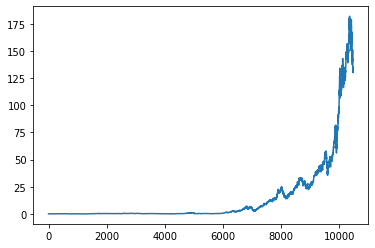

In [14]:
import matplotlib.pyplot as plt
plt.plot(data_close)

In [15]:
## LSTM are sensitive to scale of data so we have to apply MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [16]:
data

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [17]:
data

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In case of **time series data** , we shouldnt split the data based on Cross Validation or Random Seed. We should split the test on the basis of different days as each day may depend on the previous day. We cannot take Random days Stock's and train with it for the Future.


In [18]:
#Splitting into Train nd Test
training_size = int(len(data)*0.65)
test_size = len(data)-training_size
training_data , test_data = data[0:training_size,:],data[training_size:len(data),:1]


In [19]:
training_size , test_size

(6804, 3664)

In [20]:
training_data

array([[0.00043548],
       [0.00039868],
       [0.00034961],
       ...,
       [0.03359533],
       [0.03404087],
       [0.03510272]])

In [21]:
test_data

array([[0.03590156],
       [0.03549527],
       [0.03483578],
       ...,
       [0.74401091],
       [0.7144991 ],
       [0.72274263]])

**PRE_PROCESSING**

In [22]:
#We will process in such a way that we will take timestamps and use these timestamps to split into 
#out X_train Y_train and X-test and Y_test

#We will create a timestamp of 3 for example:
#We will have 3 days of Stock market closing rates with us and will give the computer the output to it which is Day 4's Closing rate.
#Similiarly now we will move a day forward and use Closing Rates of Day2 , Day3 , Day4 and give the output of Day5 to the computer to process it.
#This will be our Training Split.

#Similiarly we will do in Test Split


In [23]:
import numpy

def create_matrix(dataset,time_step=1):
  dataX , dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]  #i=0 , 0,1,2,3 4th will be appended in next line of code if time_step = 3
    dataX.append(a)     #Contains all values from 1 to Time_step
    dataY.append(dataset[i+time_step , 0])   #Contains just the end value to Time_step
  return numpy.array(dataX) , numpy.array(dataY)



In [24]:
#shaping into X=t , t+1 , t+2 , t+3 and t+4

time_step = 100
X_train, y_train = create_matrix(training_data, time_step)
X_test , y_test = create_matrix(test_data , time_step)

In [25]:
X_train

array([[0.00043548, 0.00039868, 0.00034961, ..., 0.00042322, 0.00042015,
        0.00040175],
       [0.00039868, 0.00034961, 0.00036495, ..., 0.00042015, 0.00040175,
        0.00041095],
       [0.00034961, 0.00036495, 0.00038335, ..., 0.00040175, 0.00041095,
        0.00041708],
       ...,
       [0.02469036, 0.02578556, 0.02569724, ..., 0.03190933, 0.03287108,
        0.03279453],
       [0.02578556, 0.02569724, 0.02531058, ..., 0.03287108, 0.03279453,
        0.03339906],
       [0.02569724, 0.02531058, 0.02570706, ..., 0.03279453, 0.03339906,
        0.03359533]])

In [26]:
X_train.shape #Contains all 6703 rows with 100 columns of values

(6703, 100)

In [27]:
y_train.shape  #Contains all 6703 rows with 1 column that is output of those values

(6703,)

CREATING A LSTM MODEL


In [28]:
#Re-shaping input to give to LSTM into 3-D so we will add another dimension to it

X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [29]:
#LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [30]:
#Stacked LSTM
model = Sequential()
model.add(LSTM(50 , return_sequences = True , input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [31]:
#The 50 after LSTM means 50 internal Layers in that particular LSTM
#Return_sequence have to understand properlyj

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train , y_train , validation_data = (X_test,y_test) , epochs=100 , batch_size=64 , verbose=1)

Epoch 1/100
105/105 [==============================] - 21s 156ms/step - loss: 1.8864e-05 - val_loss: 0.0069
Epoch 2/100
105/105 [==============================] - 15s 146ms/step - loss: 3.1007e-07 - val_loss: 0.0044
Epoch 3/100
105/105 [==============================] - 15s 145ms/step - loss: 4.2140e-07 - val_loss: 0.0042
Epoch 4/100
105/105 [==============================] - 15s 144ms/step - loss: 4.6725e-07 - val_loss: 0.0043
Epoch 5/100
105/105 [==============================] - 15s 147ms/step - loss: 3.6738e-07 - val_loss: 0.0041
Epoch 6/100
105/105 [==============================] - 15s 146ms/step - loss: 2.8325e-07 - val_loss: 0.0039
Epoch 7/100
105/105 [==============================] - 15s 146ms/step - loss: 2.7555e-07 - val_loss: 0.0035
Epoch 8/100
105/105 [==============================] - 15s 146ms/step - loss: 3.3094e-07 - val_loss: 0.0024
Epoch 9/100
105/105 [==============================] - 15s 146ms/step - loss: 2.7504e-07 - val_loss: 0.0023
Epoch 10/100
105/105 [======

**PREDICTION**

In [34]:
#Doing prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [35]:
#Transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [36]:
train_predict.shape

(6703, 1)

In [37]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train , train_predict))

1.0789887389330086

In [38]:
math.sqrt(mean_squared_error(y_test , test_predict))

49.25636598917839

**PLOTTING**

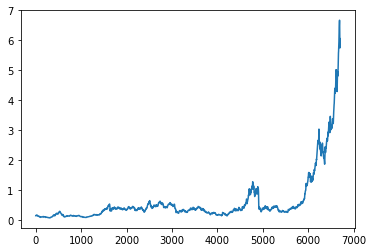

In [39]:
plt.plot(train_predict)

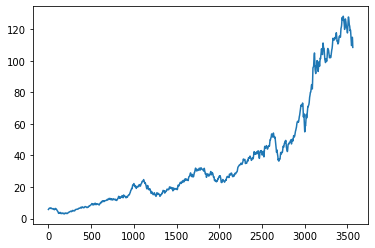

In [40]:
plt.plot(test_predict)

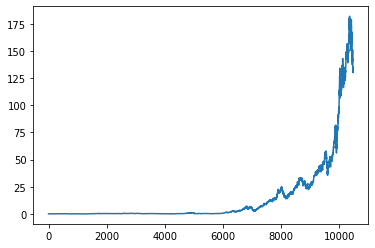

In [41]:
plt.plot(data_close)

**Prediction of other day**

In [42]:
len(test_data) 

3664

In [43]:
#To predict next day we need latest 100 days of data
x_input=test_data[3564:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.8773363152635306,
 0.8747533371017621,
 0.9358104198744073,
 0.9602662084172725,
 0.9593319526996372,
 0.9660916196452064,
 0.949934290274512,
 0.9471315176259195,
 0.9431196939421398,
 0.9605410092305111,
 0.9685097382026405,
 0.9456476602818072,
 0.9265226931624997,
 0.9278416909022779,
 0.949329759261232,
 0.9480108494524383,
 0.9278416909022779,
 0.9191584952036506,
 0.9027813713461323,
 0.8794247036209232,
 0.8940981756475049,
 0.9056940797079425,
 0.9071778546167568,
 0.896626147482859,
 0.9150916596977697,
 0.9132780721536157,
 0.8964612823828381,
 0.8751930030150215,
 0.8649710205854787,
 0.8952522258519643,
 0.8709063730223167,
 0.8500776771324615,
 0.8274904000248667,
 0.8520561242809499,
 0.8767867136370536,
 0.882447265260653,
 0.9009127774755638,
 0.9086067880697526,
 0.9275119607022361,
 0.9351509649700104,
 0.9563643149510239,
 0.9599364782172308,
 0.9647727098364127,
 0.9832382220513233,
 0.9766983386012053,
 0.9593319526996372,
 0.9576832302555041,
 0.98038043758062

In [46]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5818909]
101
1 day input [0.87475334 0.93581042 0.96026621 0.95933195 0.96609162 0.94993429
 0.94713152 0.94311969 0.96054101 0.96850974 0.94564766 0.92652269
 0.92784169 0.94932976 0.94801085 0.92784169 0.9191585  0.90278137
 0.8794247  0.89409818 0.90569408 0.90717785 0.89662615 0.91509166
 0.91327807 0.89646128 0.875193   0.86497102 0.89525223 0.87090637
 0.85007768 0.8274904  0.85205612 0.87678671 0.88244727 0.90091278
 0.90860679 0.92751196 0.93515096 0.95636431 0.95993648 0.96477271
 0.98323822 0.97669834 0.95933195 0.95768323 0.98038044 0.961805
 0.94405395 0.9457576  0.93449142 0.91064016 0.92113695 0.93619507
 0.90811211 0.90690314 0.91970801 0.91877376 0.91432226 0.88887721
 0.89486757 0.86145379 0.8601898  0.89904426 0.86612507 0.86782881
 0.87618219 0.91212402 0.86128892 0.86409169 0.83540421 0.84886862
 0.8048482  0.78319518 0.80820057 0.7995723  0.81990641 0.77363274
 0.7545627  0.75588161 0.78621783 0.77110469 0.77198402 0.78989993
 0.82210465 0.81770808 0.8169937  0.

In [47]:
len(temp_input)

101

In [48]:
day_new=np.arange(1,101) #new day with a total of 101 now
day_pred=np.arange(101,131)  #predicted 30+ days from the previous days